<a href="https://colab.research.google.com/github/Sanchana135/Car-Price-Prediction-with-Machine-Learning/blob/main/Car_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Sample dataset
data = {
    'Brand': ['Toyota','BMW','Honda','Ford','Audi','Toyota','BMW','Honda','Ford','Audi'],
    'Horsepower': [130, 250, 150, 200, 300, 120, 270, 160, 210, 320],
    'Mileage': [15000, 30000, 25000, 40000, 20000, 18000, 28000, 26000, 42000, 22000],
    'Age': [3, 5, 2, 7, 4, 4, 6, 3, 8, 5],
    'Price': [15000, 35000, 18000, 22000, 40000, 14000, 37000, 19000, 21000, 42000]
}

df = pd.DataFrame(data)
df.to_csv("car_data.csv", index=False)  # Save as CSV for consistency
print(df.head())

    Brand  Horsepower  Mileage  Age  Price
0  Toyota         130    15000    3  15000
1     BMW         250    30000    5  35000
2   Honda         150    25000    2  18000
3    Ford         200    40000    7  22000
4    Audi         300    20000    4  40000


In [4]:
df = pd.read_csv("car_data.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       10 non-null     object
 1   Horsepower  10 non-null     int64 
 2   Mileage     10 non-null     int64 
 3   Age         10 non-null     int64 
 4   Price       10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None
       Horsepower       Mileage        Age         Price
count   10.000000     10.000000  10.000000     10.000000
mean   211.000000  26600.000000   4.700000  26300.000000
std     71.561939   8859.395515   1.888562  10914.312723
min    120.000000  15000.000000   2.000000  14000.000000
25%    152.500000  20500.000000   3.250000  18250.000000
50%    205.000000  25500.000000   4.500000  21500.000000
75%    265.000000  29500.000000   5.750000  36500.000000
max    320.000000  42000.000000   8.000000  42000.000000


In [5]:
# Encode categorical variable 'Brand'
df = pd.get_dummies(df, columns=['Brand'], drop_first=True)

# Features and target
X = df.drop('Price', axis=1)
y = df['Price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Mean Squared Error: 2000000.000000029
R2 Score: 0.9591836734693872


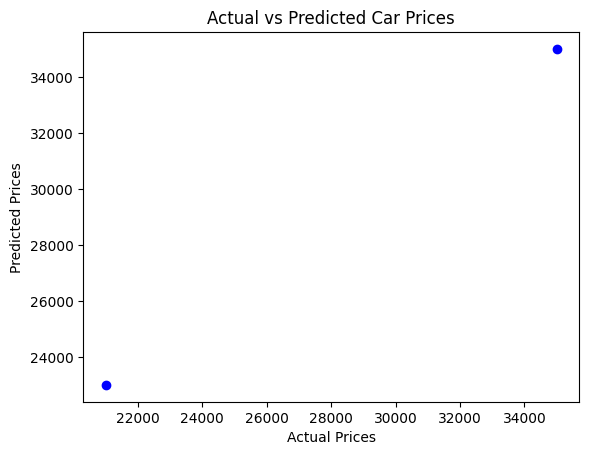

In [8]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()